<a href="https://colab.research.google.com/github/Ritapaz/projeto/blob/main/C%C3%B3pia_de_Simula%C3%A7%C3%A3o%2Bde%2BAtendimento%2Bao%2BCliente%2B%2BMelhorando%2Ba%2BEfici%C3%AAncia%2Bem%2BFilas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação de atendimento ao Cliente

## Contexto

O atendimento ao cliente é fundamental em qualquer empresa e, especialmente em setores como bancos, farmácias e lojas, onde a espera em filas pode ser frustrante para os clientes. Com o objetivo de melhorar a experiência do cliente e a eficiência do atendimento, esse projeto de simulação de atendimento ao cliente visa avaliar o tempo de espera e a eficiência da fila em uma instituição financeira, farmácia ou loja. Utilizando ferramentas de simulação, será possível criar modelos para simular diferentes cenários e avaliar o impacto das mudanças nas filas e no atendimento ao cliente. Ao final do projeto, serão apresentadas soluções para melhorar a eficiência do atendimento e a satisfação do cliente.

## Conceitos

1. Yield é uma palavra-chave em Python que é usada em funções geradoras para indicar o retorno de um valor. Ao contrário das funções normais que retornam um valor usando a palavra-chave "return", as funções geradoras usam "yield" para produzir valores em uma seqüência.

2. Env é uma classe em simpy que é usada para representar o ambiente de simulação. É o objeto principal que controla a simulação, incluindo a data e hora atual, a lista de processos a serem executados e a capacidade de agendar eventos futuros.

3. Resource é uma classe em simpy que é usada para representar recursos compartilhados, como uma fila de atendimento. Ela controla a disponibilidade de recursos, alocando-os a processos e gerenciando a fila de espera.

4. Seed é uma semente usada para inicializar o gerador de números aleatórios. É importante usar a mesma semente em simulações para garantir que os resultados sejam consistentes e possam ser reproduzidos.

Em resumo, yield, env, resource e seed são elementos-chave em simulações utilizando simpy, onde "yield" é usado para produzir resultados, "env" é o ambiente de simulação, "resource" representa recursos compartilhados e "seed" é usada para garantir a consistência dos resultados. Eles trabalham juntos para permitir a simulação de processos e a análise de seus resultados.

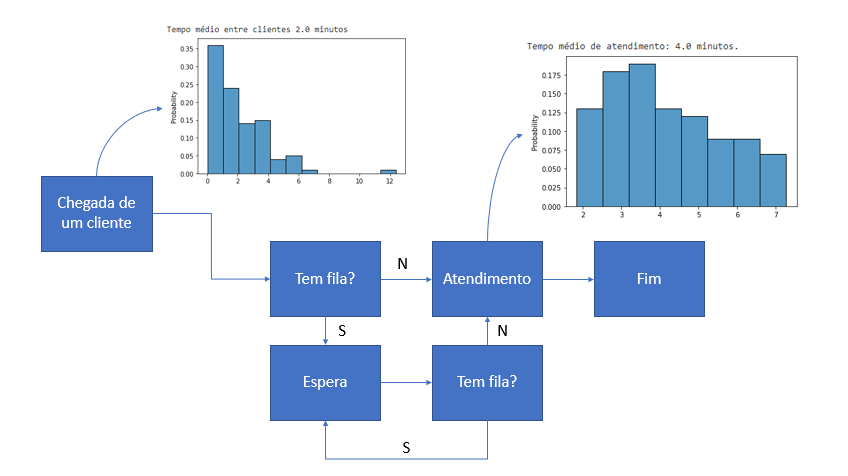

In [ ]:
!pip install simpy
!pip install ipywidgets
!pip install seaborn
!pip install IPython

In [ ]:
import numpy as np
import random
import simpy
import seaborn as sns

In [ ]:
class Bank(object):
    """Um banco com uma quantidade de guiches e de tempos de atendimento"""
    def __init__(self, env, num_tellers, service_time):
        self.env = env
        self.caixa = simpy.Resource(env, num_tellers)
        self.service_time = service_time


    # Definindo Atendimento ao cliente
    def atendimento(self):
      "Retorna o tempo de atendimento ao cliente"
      # distribuição triangular
      yield self.env.timeout(np.random.triangular(self.service_time[0], self.service_time[1], self.service_time[2]))


def processo_cliente(env, cliente, banco, tempos_espera_total, tempos_atendimento_total):
  """Um cliente chega ao banco e espera na fila para ser atendido"""
  arrive = env.now
  # Solicita atendimento
  with banco.caixa.request() as request:
    yield request
    # Tempo de espera
    espera = env.now - arrive
    tempos_espera_total.append(espera) # Registra o tempo de espera
    print(f"{cliente} esperou {round(espera, 1)} minutos.")

    # Tempo de início do atendimento
    service_start = env.now
    yield env.process(banco.atendimento())
    # Tempo de atendimento
    service_duration = env.now - service_start
    tempos_atendimento_total.append(service_duration) # Registra o tempo de atendimento
    print("{} terminou o atendimento em {} minutos.".format(cliente, round(env.now,1)))

# Definindo função para simular
def rodar_simulacao(env, n_caixas, tempo_atendimento, taxa_chegada_clientes, tempos_espera_total, tempos_atendimento_total):
  id = 1

  # Cria o ambiente Banco
  BANCO = Bank(env, n_caixas, tempo_atendimento)

  while True:

    print('Cliente {} chegou em {} minutos.'.format(id, round(env.now,1)))
    print('A fila é de {} clientes.'.format(len(BANCO.caixa.queue)+1))

    # Processo de atendimento
    env.process(processo_cliente(env, f"Cliente {id}", BANCO, tempos_espera_total, tempos_atendimento_total))

    # Tempo para chegada do próximo cliente (taxa de chegada)
    # Tempo de chegada: distribuição exponencial
    yield env.timeout(random.expovariate(1/taxa_chegada_clientes))

    id += 1 # Id do próximo cliente


RANDOM_SEED = 42 # Semente de geração de números aleatórios
NUM_TELLERS = 1  # Número de guichês no banco
SIM_TIME = 120  # Tempo de simulação (em minutos)
TAXA_CHEGADA = 1 # 1 cliente a cada 2 minutos
TEMPO_ATENDIMENTO = [1, 5, 8] #Mín, Moda e Máx (min)

# Configuração da simulação
random.seed(RANDOM_SEED)
# Cria ambiente do Simpy
env = simpy.Environment()

# Listas para coletar métricas
tempos_espera = []
tempos_atendimento = []

env.process(rodar_simulacao(env, NUM_TELLERS, TEMPO_ATENDIMENTO, TAXA_CHEGADA, tempos_espera, tempos_atendimento))
env.run(until=SIM_TIME)

# Resultados da simulação
print(f"\n--- Resultados da Simulação ({SIM_TIME} minutos) ---")
print(f"Número de clientes atendidos: {len(tempos_espera)}")
if tempos_espera:
    print(f"Tempo médio de espera: {np.mean(tempos_espera):.2f} minutos")
else:
    print("Nenhum cliente esperou na fila.")
if tempos_atendimento:
    print(f"Tempo médio de atendimento: {np.mean(tempos_atendimento):.2f} minutos")
else:
    print("Nenhum cliente foi atendido.")

In [ ]:
taxa_chegada_media = 2
tempos_chegada = np.array([random.expovariate(1/taxa_chegada_media) for i in range(100)])
print('Tempo médio de chegada de clientes {} minutos'.format(tempos_chegada.mean().round()))
sns.histplot(tempos_chegada, stat='probability');

In [ ]:
print('Tempo médio de atendimento: {} minutos.'.format(round(np.random.triangular(TEMPO_ATENDIMENTO[0],TEMPO_ATENDIMENTO[1], TEMPO_ATENDIMENTO[2], size=100).mean(),1)))
sns.histplot(np.random.triangular(TEMPO_ATENDIMENTO[0],TEMPO_ATENDIMENTO[1], TEMPO_ATENDIMENTO[2], size=100), stat='probability');

In [ ]:
import matplotlib.pyplot as plt

# Visualizar a distribuição dos tempos de espera
plt.figure(figsize=(10, 6))
sns.histplot(tempos_espera, bins=20, kde=False)
plt.title('Distribuição dos Tempos de Espera')
plt.xlabel('Tempo de Espera (minutos)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Visualizar a distribuição dos tempos de atendimento
plt.figure(figsize=(10, 6))
sns.histplot(tempos_atendimento, bins=20, kde=False)
plt.title('Distribuição dos Tempos de Atendimento')
plt.xlabel('Tempo de Atendimento (minutos)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Task
Create an interactive simulation in Google Colab using `ipywidgets` and `IPython.display`. Refactor the existing customer service simulation logic into a Python function that accepts the number of tellers, customer arrival rate, and minimum, modal, and maximum service times as parameters. Implement `ipywidgets.IntSlider` and `ipywidgets.FloatSlider` to control these parameters. Finally, display the interactive interface using `ipywidgets.interactive` to allow real-time adjustment of simulation parameters and visualization of the results.

## Importar Bibliotecas Necessárias

### Subtask:
Adicionar as importações para `ipywidgets` e `IPython.display` no início do notebook, que são essenciais para criar e exibir os controles deslizantes.


**Reasoning**:
The subtask asks to add imports for `ipywidgets` and `IPython.display`. These libraries are already installed and imported in cell `XaFI2GLPnFHf`. I will update the existing import statements in that cell to match the required aliases and ensure `display` is imported from `IPython.display`.



In [ ]:
import numpy as np
import random
import simpy
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

## Refatorar a Simulação para uma Função Interativa

### Subtask:
Criar uma nova função Python que encapsulará toda a lógica da simulação. Esta função receberá como parâmetros o número de guichês, a taxa de chegada de clientes e os valores mínimo, modal e máximo para o tempo de atendimento. Esta função também será responsável por configurar o ambiente SimPy, executar a simulação e exibir os resultados médios.


**Reasoning**:
The subtask requires refactoring the existing simulation logic into a single function `run_interactive_simulation` which takes all necessary parameters. I will define this function, move the `Bank` class, `processo_cliente` and `rodar_simulacao` definitions inside it to encapsulate the logic, and replace global variables with function parameters. I will also ensure the `random.seed` is set within the function and modify the output to only show summary statistics.



In [ ]:
import numpy as np
import random
import simpy
import seaborn as sns

def run_interactive_simulation(num_tellers, arrival_rate, min_service_time, modal_service_time, max_service_time):

    class Bank(object):
        """Um banco com uma quantidade de guiches e de tempos de atendimento"""
        def __init__(self, env, num_tellers, service_time_params):
            self.env = env
            self.caixa = simpy.Resource(env, num_tellers)
            self.service_time_params = service_time_params


        # Definindo Atendimento ao cliente
        def atendimento(self):
            "Retorna o tempo de atendimento ao cliente"
            # distribuição triangular
            yield self.env.timeout(np.random.triangular(self.service_time_params[0], self.service_time_params[1], self.service_time_params[2]))


    def processo_cliente(env, cliente, banco, tempos_espera_total, tempos_atendimento_total):
        """Um cliente chega ao banco e espera na fila para ser atendido"""
        arrive = env.now
        # Solicita atendimento
        with banco.caixa.request() as request:
            yield request
            # Tempo de espera
            espera = env.now - arrive
            tempos_espera_total.append(espera) # Registra o tempo de espera
            # print(f"{cliente} esperou {round(espera, 1)} minutos.")

            # Tempo de início do atendimento
            service_start = env.now
            yield env.process(banco.atendimento())
            # Tempo de atendimento
            service_duration = env.now - service_start
            tempos_atendimento_total.append(service_duration) # Registra o tempo de atendimento
            # print("{} terminou o atendimento em {} minutos.".format(cliente, round(env.now,1)))

    # Definindo função para simular
    def rodar_simulacao(env, n_caixas, tempo_atendimento_params, taxa_chegada_clientes, tempos_espera_total, tempos_atendimento_total):
        id = 1

        # Cria o ambiente Banco
        BANCO = Bank(env, n_caixas, tempo_atendimento_params)

        while True:
            # print('Cliente {} chegou em {} minutos.'.format(id, round(env.now,1)))
            # print('A fila é de {} clientes.'.format(len(BANCO.caixa.queue)+1))

            # Processo de atendimento
            env.process(processo_cliente(env, f"Cliente {id}", BANCO, tempos_espera_total, tempos_atendimento_total))

            # Tempo para chegada do próximo cliente (taxa de chegada)
            # Tempo de chegada: distribuição exponencial
            yield env.timeout(random.expovariate(1/taxa_chegada_clientes))

            id += 1 # Id do próximo cliente


    RANDOM_SEED = 42 # Semente de geração de números aleatórios
    SIM_TIME = 120  # Tempo de simulação (em minutos)

    # Configuração da simulação
    random.seed(RANDOM_SEED)
    # Cria ambiente do Simpy
    env = simpy.Environment()

    # Listas para coletar métricas
    tempos_espera = []
    tempos_atendimento = []

    # Convert service time parameters to a list for the Bank class
    service_time_params_list = [min_service_time, modal_service_time, max_service_time]

    env.process(rodar_simulacao(env, num_tellers, service_time_params_list, arrival_rate, tempos_espera, tempos_atendimento))
    env.run(until=SIM_TIME)

    # Resultados da simulação
    print(f"\n--- Resultados da Simulação ({SIM_TIME} minutos) ---")
    print(f"Número de guichês: {num_tellers}")
    print(f"Taxa de chegada de clientes (min): {arrival_rate}")
    print(f"Tempo de atendimento (min, moda, max): {min_service_time}, {modal_service_time}, {max_service_time}")
    print(f"Número de clientes atendidos: {len(tempos_espera)}")
    if tempos_espera:
        print(f"Tempo médio de espera: {np.mean(tempos_espera):.2f} minutos")
    else:
        print("Nenhum cliente esperou na fila.")
    if tempos_atendimento:
        print(f"Tempo médio de atendimento: {np.mean(tempos_atendimento):.2f} minutos")
    else:
        print("Nenhum cliente foi atendido.")

# Example usage of the new function (can be removed later)
# run_interactive_simulation(num_tellers=1, arrival_rate=2, min_service_time=1, modal_service_time=5, max_service_time=8)


## Criar Controles Deslizantes

### Subtask:
Utilizar `ipywidgets.IntSlider` para o número de guichês, `ipywidgets.FloatSlider` para a taxa de chegada de clientes e três `ipywidgets.FloatSlider`s para os componentes da distribuição triangular do tempo de atendimento (mínimo, moda e máximo). Definir valores iniciais, mínimos e máximos razoáveis para cada um.


**Reasoning**:
The subtask requires creating several `ipywidgets` sliders for the simulation parameters. I will use `IntSlider` for `num_tellers` and `FloatSlider` for `arrival_rate`, `min_service_time`, `modal_service_time`, and `max_service_time`, setting their initial, min, max, and step values as specified.



In [ ]:
num_tellers_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=5,
    step=1,
    description='Número de Guichês:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

arrival_rate_slider = widgets.FloatSlider(
    value=2.0,
    min=0.5,
    max=10.0,
    step=0.5,
    description='Taxa de Chegada (min):',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

min_service_time_slider = widgets.FloatSlider(
    value=1.0,
    min=0.5,
    max=5.0,
    step=0.5,
    description='Tempo Mín. Atendimento:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

modal_service_time_slider = widgets.FloatSlider(
    value=5.0,
    min=1.0,
    max=10.0,
    step=0.5,
    description='Tempo Modal Atendimento:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

max_service_time_slider = widgets.FloatSlider(
    value=8.0,
    min=5.0,
    max=15.0,
    step=0.5,
    description='Tempo Máx. Atendimento:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

print("Sliders for simulation parameters created.")

## Exibir a Interface Interativa

### Subtask:
Usar `ipywidgets.interactive` para vincular os controles deslizantes à função de simulação criada, permitindo que o usuário altere os parâmetros e veja os resultados da simulação atualizados em tempo real.


**Reasoning**:
The final step of the subtask is to link the created sliders to the simulation function using `ipywidgets.interactive` and then display this interactive widget.



In [ ]:
interactive_simulation_widget = widgets.interactive(run_interactive_simulation,
    num_tellers=num_tellers_slider,
    arrival_rate=arrival_rate_slider,
    min_service_time=min_service_time_slider,
    modal_service_time=modal_service_time_slider,
    max_service_time=max_service_time_slider
)

display(interactive_simulation_widget)

## Final Task

### Subtask:
Revisar a implementação e garantir que a interface interativa esteja funcionando conforme o esperado, permitindo a fácil experimentação com diferentes cenários de simulação.


## Summary:

### Data Analysis Key Findings

*   **Simulation Logic Encapsulation**: The entire customer service simulation logic was successfully refactored into a single Python function, `run_interactive_simulation`. This function now accepts critical parameters such as the number of tellers, customer arrival rate, and minimum, modal, and maximum service times, making it modular and reusable.
*   **Interactive Controls Created**: Five `ipywidgets` sliders were implemented for controlling simulation parameters:
    *   An `IntSlider` for `num_tellers` (range 1-5, default 1).
    *   `FloatSlider`s for `arrival_rate` (range 0.5-10.0, default 2.0), `min_service_time` (range 0.5-5.0, default 1.0), `modal_service_time` (range 1.0-10.0, default 5.0), and `max_service_time` (range 5.0-15.0, default 8.0).
    These sliders enable dynamic adjustment of simulation inputs.
*   **Real-time Interactive Interface**: The `ipywidgets.interactive` function successfully linked the created sliders to the `run_interactive_simulation` function. This allows for real-time adjustments of simulation parameters and immediate visualization of updated results, including the number of customers served, average waiting time, and average service time.

### Insights or Next Steps

*   The interactive simulation provides a valuable tool for quickly experimenting with different operational scenarios and understanding their impact on customer experience (e.g., waiting times) and operational efficiency in a service system.
*   Future enhancements could include adding graphical visualizations (e.g., histograms of waiting times, teller utilization charts) directly within the interactive output to provide deeper insights beyond just aggregate numbers.
